In [413]:
#packages
import warnings
warnings.filterwarnings("ignore")
import gnssmapper as gm
import copy
import pandas as pd
from pandas import DataFrame
import numpy as np
import geopandas as gpd
import math
from math import cos,sin
import shapely
from shapely.geometry import Point,Polygon,shape
from shapely.geometry import mapping
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt
import os

import gnss_process
import sampling

# 1.read files

In [2]:
path = r'/Users/jyjy/Desktop/data'
filenames =os.listdir(path)

for name in filenames:
    #ignore .txt in filenames
    filenames[filenames.index(name)]=name[:-4]
filenames_sort = sorted(filenames)

In [3]:
#day data
names1 = filenames_sort[0:25]
#night data
names2 = filenames_sort[25:]

In [4]:
names1

['gnss_log_2021_08_01_19_51_17',
 'gnss_log_2021_08_01_19_53_15',
 'gnss_log_2021_08_01_19_55_18',
 'gnss_log_2021_08_01_19_59_01',
 'gnss_log_2021_08_01_20_01_13',
 'gnss_log_2021_08_01_20_03_46',
 'gnss_log_2021_08_01_20_06_32',
 'gnss_log_2021_08_01_20_14_01',
 'gnss_log_2021_08_01_20_14_38',
 'gnss_log_2021_08_01_20_15_16',
 'gnss_log_2021_08_01_20_15_50',
 'gnss_log_2021_08_01_20_16_29',
 'gnss_log_2021_08_01_20_17_10',
 'gnss_log_2021_08_01_20_17_48',
 'gnss_log_2021_08_01_20_18_26',
 'gnss_log_2021_08_01_20_19_24',
 'gnss_log_2021_08_01_20_20_00',
 'gnss_log_2021_08_01_20_20_37',
 'gnss_log_2021_08_01_20_21_22',
 'gnss_log_2021_08_01_20_21_59',
 'gnss_log_2021_08_01_20_22_39',
 'gnss_log_2021_08_01_20_23_18',
 'gnss_log_2021_08_01_20_24_00',
 'gnss_log_2021_08_01_20_24_39',
 'gnss_log_2021_08_01_20_25_21']

In [5]:
names2

['gnss_log_2021_08_03_08_27_07',
 'gnss_log_2021_08_03_08_29_15',
 'gnss_log_2021_08_03_08_31_35',
 'gnss_log_2021_08_03_08_33_56',
 'gnss_log_2021_08_03_08_36_16',
 'gnss_log_2021_08_03_08_39_43',
 'gnss_log_2021_08_03_08_42_23',
 'gnss_log_2021_08_03_08_45_19',
 'gnss_log_2021_08_03_08_50_04',
 'gnss_log_2021_08_03_08_50_50',
 'gnss_log_2021_08_03_08_51_36',
 'gnss_log_2021_08_03_08_52_24',
 'gnss_log_2021_08_03_08_53_12',
 'gnss_log_2021_08_03_08_54_03',
 'gnss_log_2021_08_03_08_54_55',
 'gnss_log_2021_08_03_08_55_40',
 'gnss_log_2021_08_03_08_56_31',
 'gnss_log_2021_08_03_08_57_18',
 'gnss_log_2021_08_03_08_58_06',
 'gnss_log_2021_08_03_08_58_52',
 'gnss_log_2021_08_03_08_59_37']

In [6]:
daydata = [gm.read_gnsslogger(r'/Users/jyjy/Desktop/data/'+name+'.txt') for name in names1]
nightdata = [gm.read_gnsslogger(r'/Users/jyjy/Desktop/data/'+name+'.txt') for name in names2]

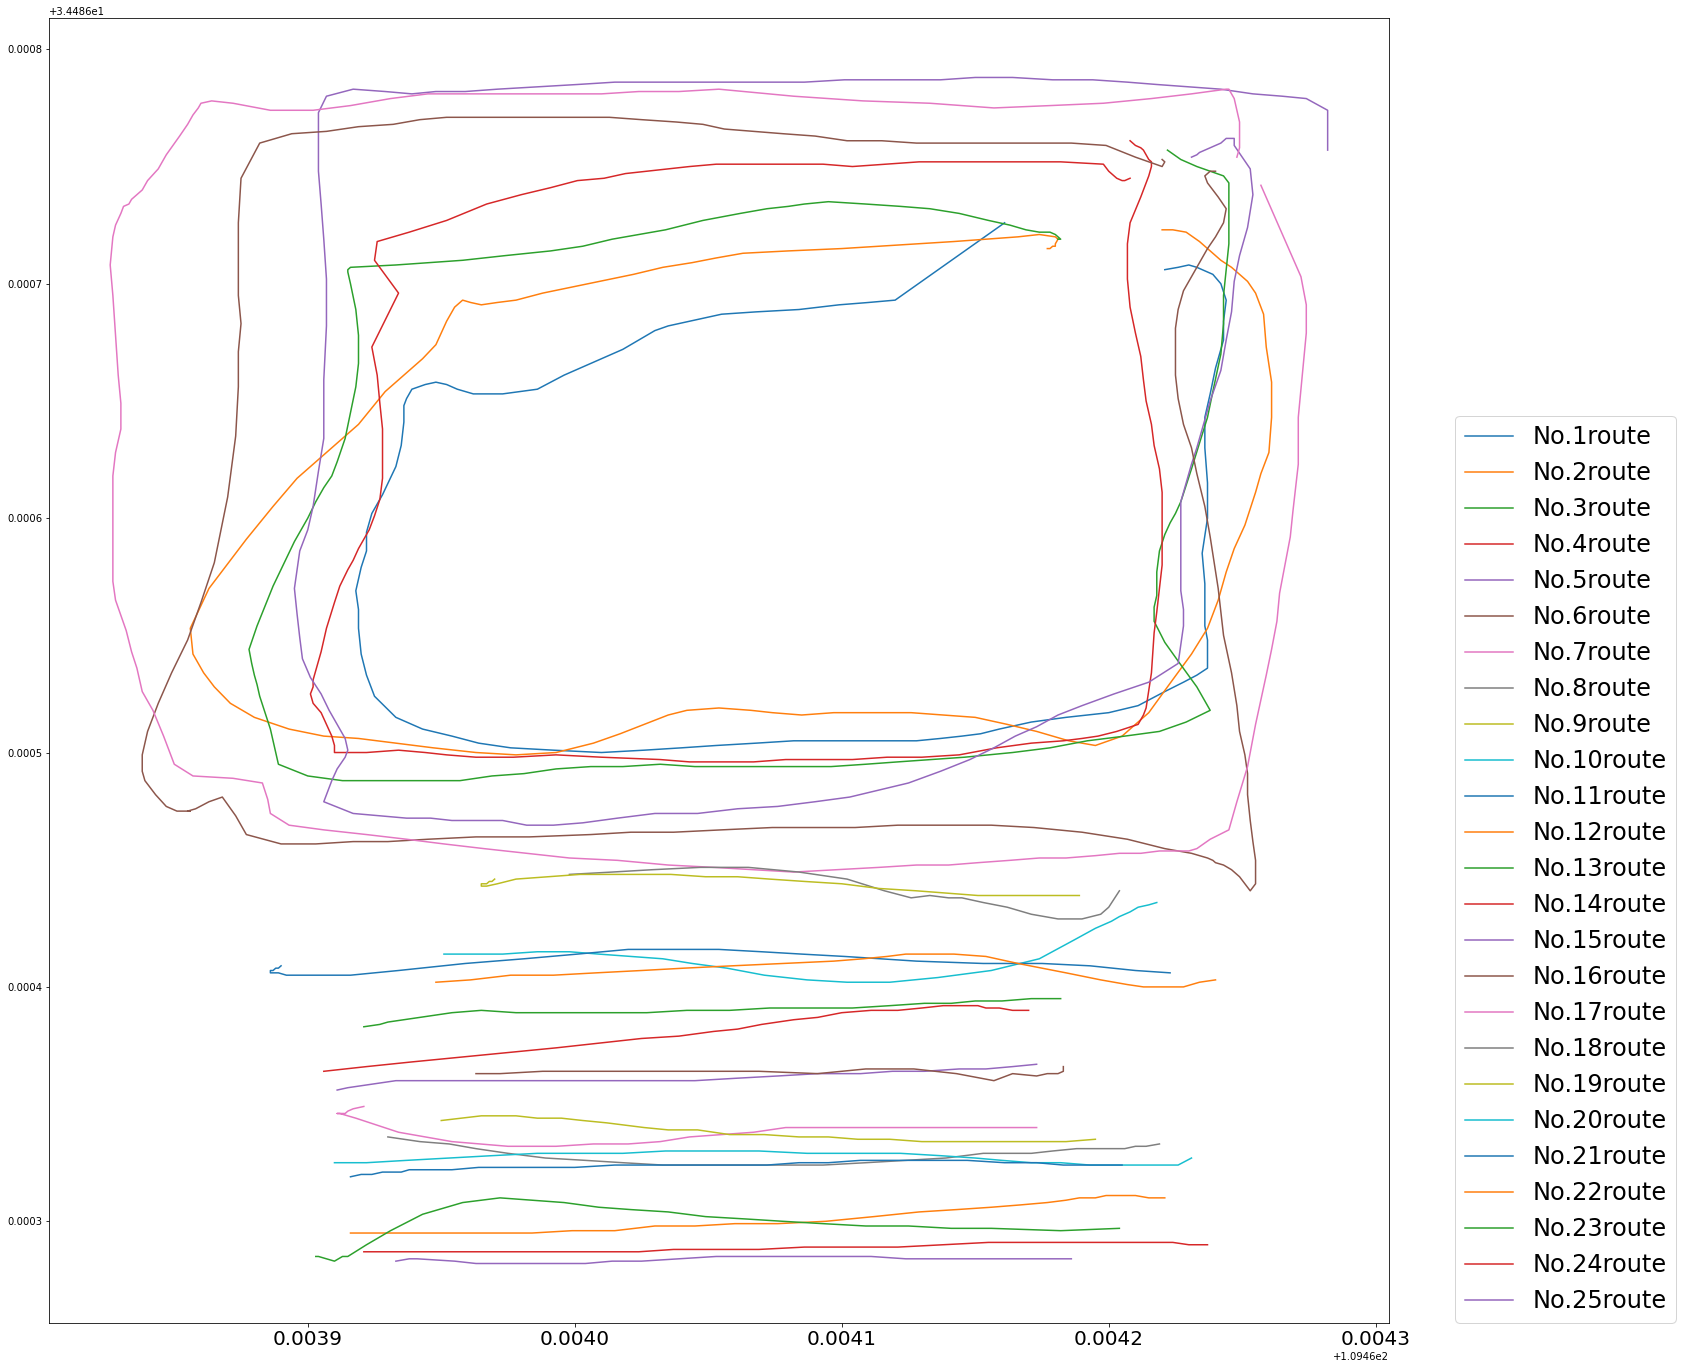

In [7]:
#route of collecting daydata
plt_label = 0
plt.figure(figsize=(24,24))
# 改变文字大小参数-fontsize
plt.xticks(fontsize=20)
for i in range(25):
    plt_label += 1
    plt.plot(daydata[i].geometry.x,daydata[i].geometry.y,label = 'No.'+ str(plt_label) + 'route')

num1=1.05
num2 = 0
num3=3
num4=0
plt.legend(fontsize=24,bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4)

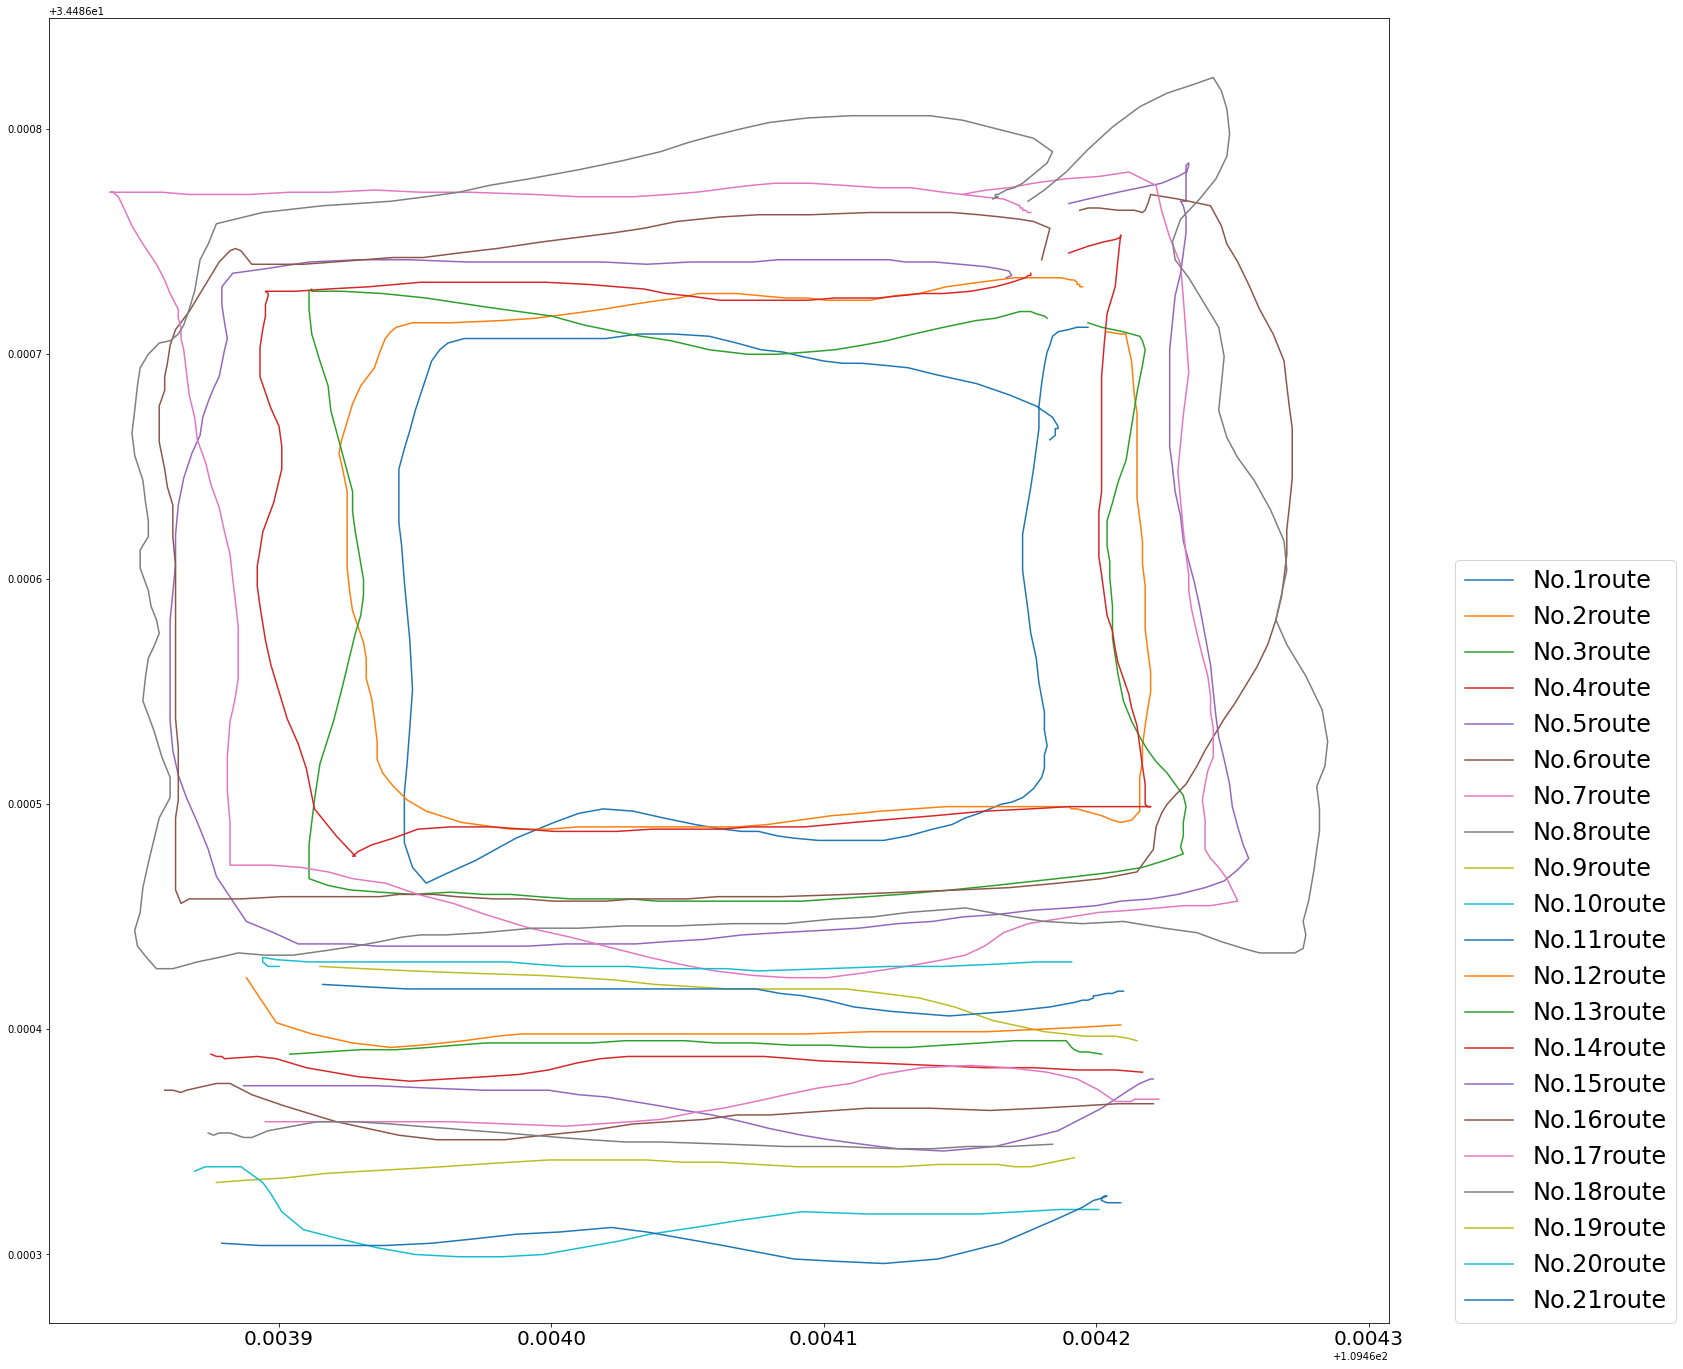

In [8]:
#route of collecting night data
plt_label = 0
plt.figure(figsize=(24,24))
# 改变文字大小参数-fontsize
plt.xticks(fontsize=20)
for i in range(21):
    plt_label += 1
    plt.plot(nightdata[i].geometry.x,nightdata[i].geometry.y,label = 'No.'+ str(plt_label) + 'route')

num1=1.05
num2 = 0
num3=3
num4=0
plt.legend(fontsize=24,bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4)

In [9]:
daydata[0][['time','Cn0DbHz','svid','geometry']]

,time,Cn0DbHz,svid,geometry
0,2021-08-01 11:51:17.000194934,42.878216,G10,POINT Z (109.46416 34.48673 358.06882)
1,2021-08-01 11:51:17.000194934,31.684649,NaN,POINT Z (109.46416 34.48673 358.06882)
2,2021-08-01 11:51:17.000194934,31.919548,NaN,POINT Z (109.46416 34.48673 358.06882)
3,2021-08-01 11:51:17.000194934,38.790283,R08,POINT Z (109.46416 34.48673 358.06882)
4,2021-08-01 11:51:17.000194934,37.847214,R07,POINT Z (109.46416 34.48673 358.06882)
...,...,...,...,...
1659,2021-08-01 11:52:53.000232077,30.675339,G12,POINT Z (109.46422 34.48671 363.48242)
1660,2021-08-01 11:52:53.000232077,41.686920,G10,POINT Z (109.46422 34.48671 363.48242)
1661,2021-08-01 11:52:53.000232077,29.947206,C24,POINT Z (109.46422 34.48671 363.48242)
1662,2021-08-01 11:52:53.000232077,29.306194,R09,POINT Z (109.46422 34.48671 363.48242)


In [10]:
daydata[24][['time','Cn0DbHz','svid','geometry']]

,time,Cn0DbHz,svid,geometry
0,2021-08-01 12:25:21.999986384,43.610645,G10,POINT Z (109.46393 34.48628 358.32758)
1,2021-08-01 12:25:21.999986384,38.894543,C33,POINT Z (109.46393 34.48628 358.32758)
2,2021-08-01 12:25:21.999986384,23.288004,C27,POINT Z (109.46393 34.48628 358.32758)
3,2021-08-01 12:25:21.999986384,40.509045,C26,POINT Z (109.46393 34.48628 358.32758)
4,2021-08-01 12:25:21.999986384,32.172215,C25,POINT Z (109.46393 34.48628 358.32758)
...,...,...,...,...
722,2021-08-01 12:25:49.999997242,43.104897,G12,POINT Z (109.46419 34.48628 358.30197)
723,2021-08-01 12:25:49.999997242,43.186081,G10,POINT Z (109.46419 34.48628 358.30197)
724,2021-08-01 12:25:49.999997242,26.079788,C27,POINT Z (109.46419 34.48628 358.30197)
725,2021-08-01 12:25:49.999997242,40.535389,R16,POINT Z (109.46419 34.48628 358.30197)


In [11]:
len(daydata)

25

In [12]:
nightdata[0][['time','Cn0DbHz','svid','geometry']]

,time,Cn0DbHz,svid,geometry
0,2021-08-03 00:27:07.000127097,21.181335,G01,POINT Z (109.46418 34.48666 358.63211)
1,2021-08-03 00:27:07.000127097,33.976040,NaN,POINT Z (109.46418 34.48666 358.63211)
2,2021-08-03 00:27:07.000127097,41.453079,NaN,POINT Z (109.46418 34.48666 358.63211)
3,2021-08-03 00:27:07.000127097,25.025410,NaN,POINT Z (109.46418 34.48666 358.63211)
4,2021-08-03 00:27:07.000127097,24.641365,R03,POINT Z (109.46418 34.48666 358.63211)
...,...,...,...,...
2458,2021-08-03 00:28:59.000170954,27.746870,G03,POINT Z (109.46420 34.48671 358.24805)
2459,2021-08-03 00:28:59.000170954,29.028038,G01,POINT Z (109.46420 34.48671 358.24805)
2460,2021-08-03 00:28:59.000170954,29.834085,C28,POINT Z (109.46420 34.48671 358.24805)
2461,2021-08-03 00:28:59.000170954,37.609558,R02,POINT Z (109.46420 34.48671 358.24805)


In [13]:
nightdata[20][['time','Cn0DbHz','svid','geometry']]

,time,Cn0DbHz,svid,geometry
0,2021-08-03 00:59:36.999879198,34.586693,G01,POINT Z (109.46421 34.48632 356.79114)
1,2021-08-03 00:59:36.999879198,41.677528,C36,POINT Z (109.46421 34.48632 356.79114)
2,2021-08-03 00:59:36.999879198,26.690674,C33,POINT Z (109.46421 34.48632 356.79114)
3,2021-08-03 00:59:36.999879198,33.300758,C32,POINT Z (109.46421 34.48632 356.79114)
4,2021-08-03 00:59:36.999879198,40.757713,C30,POINT Z (109.46421 34.48632 356.79114)
...,...,...,...,...
934,2021-08-03 01:00:09.999891907,7.000000,G02,POINT Z (109.46388 34.48631 356.99252)
935,2021-08-03 01:00:09.999891907,36.974091,G01,POINT Z (109.46388 34.48631 356.99252)
936,2021-08-03 01:00:09.999891907,20.613083,C33,POINT Z (109.46388 34.48631 356.99252)
937,2021-08-03 01:00:09.999891907,21.990143,R02,POINT Z (109.46388 34.48631 356.99252)


In [14]:
len(nightdata)

21

# 2.Data preprocess

In [15]:
for i in range(len(daydata)):
    daydata[i]['time']=pd.to_datetime(daydata[i]['time'])
    daydata[i]['time'] = daydata[i]['time'] + pd.Timedelta(hours=1)
    daydata[i] = gnss_process.time_form(daydata[i])
    daydata[i] = gnss_process.valid_svid(daydata[i])
    daydata[i] = gnss_process.data_format(daydata[i])

In [16]:
daydata[0].head()

,svid,time,Cn0DbHz,geometry
0,G10,2021-08-01 12:51:17,42.878216,POINT Z (109.46416 34.48673 381.00000)
3,R08,2021-08-01 12:51:17,38.790283,POINT Z (109.46416 34.48673 381.00000)
4,R07,2021-08-01 12:51:17,37.847214,POINT Z (109.46416 34.48673 381.00000)
5,R16,2021-08-01 12:51:17,26.089874,POINT Z (109.46416 34.48673 381.00000)
6,R09,2021-08-01 12:51:17,34.727238,POINT Z (109.46416 34.48673 381.00000)


In [17]:
len(daydata)

25

In [18]:
for i in range(len(nightdata)):
    nightdata[i]['time']=pd.to_datetime(nightdata[i]['time'])
    nightdata[i]['time'] = nightdata[i]['time'] + pd.Timedelta(hours=1)
    nightdata[i] = gnss_process.time_form(nightdata[i])
    nightdata[i] = gnss_process.valid_svid(nightdata[i])
    nightdata[i] = gnss_process.data_format(nightdata[i])

In [19]:
nightdata[0].head()

,svid,time,Cn0DbHz,geometry
0,G01,2021-08-03 01:27:07,21.181335,POINT Z (109.46418 34.48666 381.00000)
4,R03,2021-08-03 01:27:07,24.641365,POINT Z (109.46418 34.48666 381.00000)
5,R19,2021-08-03 01:27:07,31.255043,POINT Z (109.46418 34.48666 381.00000)
6,R16,2021-08-03 01:27:07,17.234669,POINT Z (109.46418 34.48666 381.00000)
7,R09,2021-08-03 01:27:07,37.303123,POINT Z (109.46418 34.48666 381.00000)


In [20]:
len(nightdata)

21

## observation rays of each collecting route for day data and night data

In [21]:
#observation of daydata
dayobs = []
for i in range(len(daydata)):
    dayobs.append(gm.observe(daydata[i]))

In [22]:
dayobs[0].head()

,time,svid,Cn0DbHz,geometry
0,2021-08-01 12:51:17,C02,NaN,LINESTRING Z (-1753785.664 4962400.437 3591294...
1,2021-08-01 12:51:17,C03,NaN,LINESTRING Z (-1753785.664 4962400.437 3591294...
2,2021-08-01 12:51:17,C04,NaN,LINESTRING Z (-1753785.664 4962400.437 3591294...
3,2021-08-01 12:51:17,C05,NaN,LINESTRING Z (-1753785.664 4962400.437 3591294...
4,2021-08-01 12:51:17,C06,NaN,LINESTRING Z (-1753785.664 4962400.437 3591294...


In [23]:
len(dayobs)

25

In [24]:
#observation of nightdata
nightobs = []
for i in range(len(nightdata)):
    nightobs.append(gm.observe(nightdata[i]))

In [25]:
len(nightobs)

21

## estimated height for each route

In [26]:
#create map of the building
mymap = gpd.read_file('laketower.geojson')
#define the height of building is zero
mymap['height'] = 0

In [27]:
#height by daydata
dayestimates = []
for i in range(len(daydata)):
    dayestimates.append(gm.predict(mymap,dayobs[i].sort_values(by=['time','svid'])))

In [28]:
dayestimates[0].lower_bound

0    1000.0
Name: lower_bound, dtype: float64

In [29]:
len(dayestimates)

25

In [30]:
valid_route = []
for i in range(len(dayestimates)):
    if int(dayestimates[i].lower_bound) < 470:
        valid_route.append(i)

In [31]:
valid_route

[2, 3, 4, 5, 7, 11, 13, 15, 21, 23]

In [32]:
#valid day data
daydata = pd.concat(daydata[i][['time','Cn0DbHz','svid','geometry']]\
                           for i in valid_route)

In [33]:
daydata.head()

,time,Cn0DbHz,svid,geometry
0,2021-08-01 12:55:19,39.627029,G10,POINT Z (109.46418 34.48672 381.00000)
1,2021-08-01 12:55:19,33.723839,C33,POINT Z (109.46418 34.48672 381.00000)
2,2021-08-01 12:55:19,42.963753,C27,POINT Z (109.46418 34.48672 381.00000)
3,2021-08-01 12:55:19,24.468140,C26,POINT Z (109.46418 34.48672 381.00000)
4,2021-08-01 12:55:19,31.295225,C24,POINT Z (109.46418 34.48672 381.00000)


In [34]:
len(daydata)

15050

In [35]:
#height by nightdata
nightestimates = []
for i in range(len(nightdata)):
    nightestimates.append(gm.predict(mymap,nightobs[i].sort_values(by=['time','svid'])))

In [36]:
nightestimates[0].lower_bound

0    450.596944
Name: lower_bound, dtype: float64

In [37]:
len(nightestimates)

21

In [38]:
valid_route = []
for i in range(len(nightestimates)):
    if int(nightestimates[i].lower_bound) < 470:
        valid_route.append(i)

In [39]:
valid_route

[0, 1, 2, 6, 8, 9, 10, 16, 20]

In [40]:
#valid night data
nightdata = pd.concat(nightdata[i][['time','Cn0DbHz','svid','geometry']]\
                           for i in valid_route)

In [41]:
nightdata.head()

,time,Cn0DbHz,svid,geometry
0,2021-08-03 01:27:07,21.181335,G01,POINT Z (109.46418 34.48666 381.00000)
4,2021-08-03 01:27:07,24.641365,R03,POINT Z (109.46418 34.48666 381.00000)
5,2021-08-03 01:27:07,31.255043,R19,POINT Z (109.46418 34.48666 381.00000)
6,2021-08-03 01:27:07,17.234669,R16,POINT Z (109.46418 34.48666 381.00000)
7,2021-08-03 01:27:07,37.303123,R09,POINT Z (109.46418 34.48666 381.00000)


In [42]:
len(nightdata)

15198

In [43]:
#all data
alldata = pd.concat([daydata,nightdata])

In [44]:
alldata.head()

,time,Cn0DbHz,svid,geometry
0,2021-08-01 12:55:19,39.627029,G10,POINT Z (109.46418 34.48672 381.00000)
1,2021-08-01 12:55:19,33.723839,C33,POINT Z (109.46418 34.48672 381.00000)
2,2021-08-01 12:55:19,42.963753,C27,POINT Z (109.46418 34.48672 381.00000)
3,2021-08-01 12:55:19,24.468140,C26,POINT Z (109.46418 34.48672 381.00000)
4,2021-08-01 12:55:19,31.295225,C24,POINT Z (109.46418 34.48672 381.00000)


In [45]:
len(alldata)

30248

In [46]:
#check length to verify combine result is true
len(alldata) == sum([len(daydata),len(nightdata)])

True

# 3.sampling strategy

## 3.1 random samping

## 3.1.1 random sampling by fraction

### day data

In [228]:
time_start=time.time()
#initialize
daysample = [0]*10
#for loop to obtain each samples
for i in range(10):
    daysample[i] = sampling.random_frac(daydata,i)
time_end=time.time()
print('run time is: ',time_end-time_start)

run time is:  0.37032318115234375


In [229]:
daysample[0].head()

,time,Cn0DbHz,svid,geometry
1646,2021-08-01 13:04:50,14.950093,G24,POINT Z (109.46392 34.48646 381.00000)
636,2021-08-01 12:59:25,34.177094,R07,POINT Z (109.46422 34.48661 381.00000)
1246,2021-08-01 12:59:48,21.356703,R07,POINT Z (109.46407 34.48650 381.00000)
2640,2021-08-01 13:05:30,29.371233,R23,POINT Z (109.46397 34.48677 381.00000)
2890,2021-08-01 13:05:40,43.805058,R07,POINT Z (109.46409 34.48676 381.00000)


In [230]:
#validate the length before and after random sampling 
bools = []
for i in range (10):
    a = len(daysample[i]) == round(len(daydata)*(i+1)/10)
    bools.append(a)
bools

[True, True, True, True, True, True, True, True, True, True]

In [231]:
#observations 
daysampleobs = [0]*10
for i in range(10):
    daysampleobs[i] = gm.observe(daysample[i])

In [232]:
#heights
daysampleh = [0]*10
for i in range(10):
    daysampleh[i] = gm.predict(mymap,daysampleobs[i].sort_values(by = ['time','svid']))

In [233]:
daysampleh = sampling.combine_height(daysampleh)
daysampleh

,lower_bound,mid_point,upper_bound
0,511.400665,512.677092,513.953519
1,995.032988,1271.981827,1548.930666
2,999.672334,1450.195993,1900.719652
3,452.497691,452.649007,452.800322
4,453.667915,454.269517,454.871119
5,469.867771,470.455097,471.042422
6,454.255251,454.792694,455.330136
7,420.613992,420.718392,420.822793
8,423.664679,423.755117,423.845555
9,424.171897,424.316936,424.461975


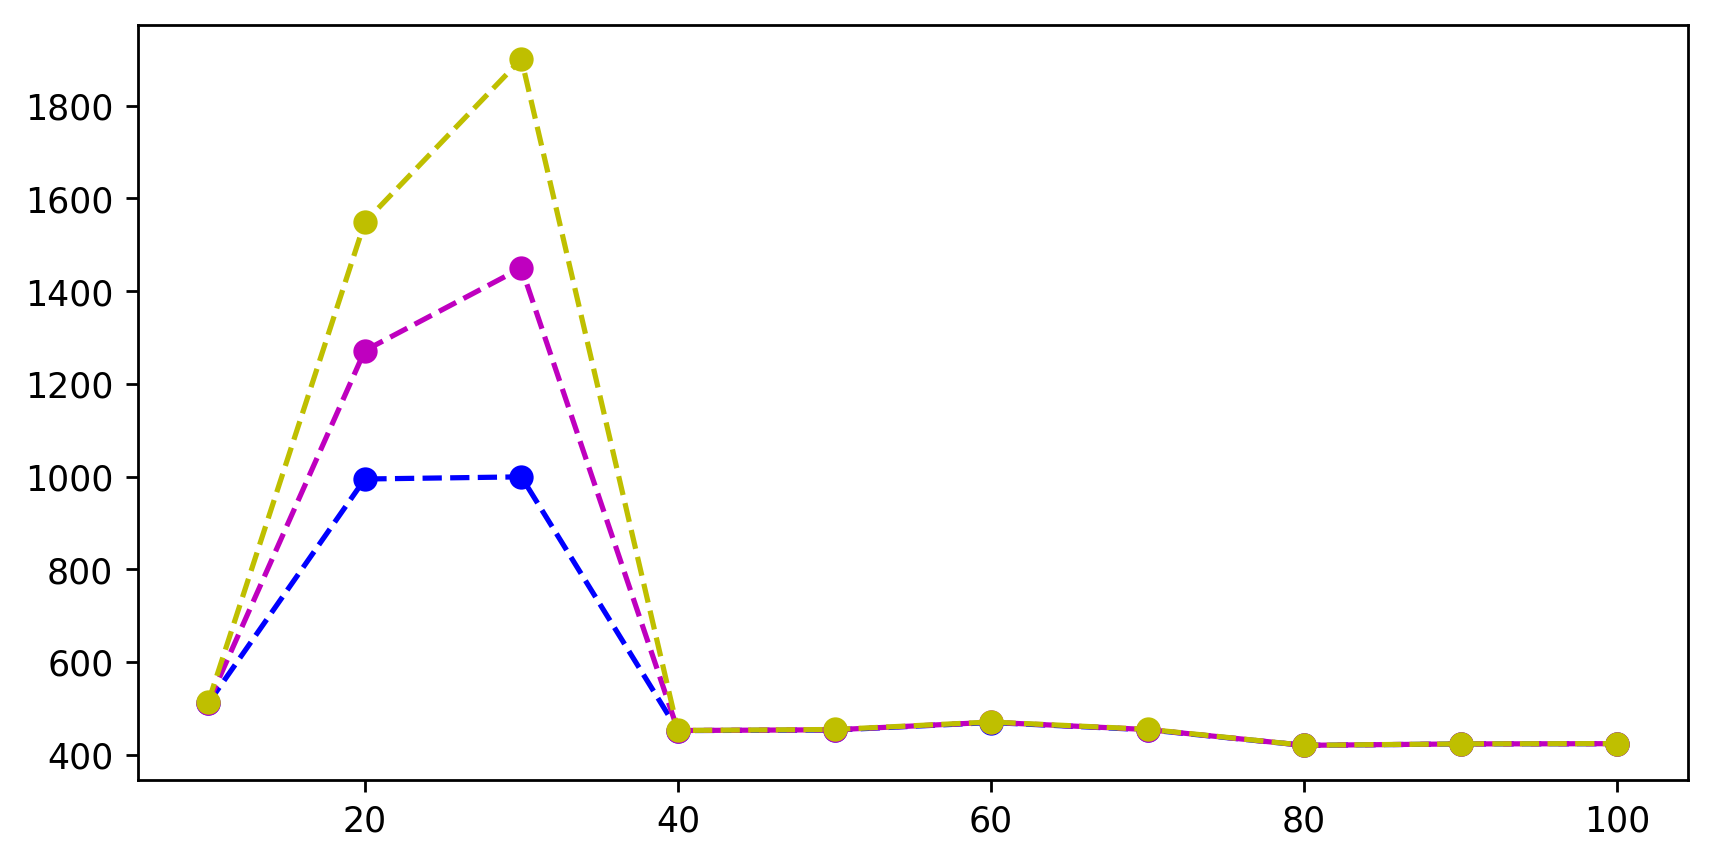

In [234]:
fig = plt.figure(1,(8,4),dpi = 250)    
ax  = plt.subplot(111)
plt.sca(ax)
plt.plot(ratio,daysampleh['lower_bound'],'b--')
plt.plot(ratio,daysampleh['lower_bound'],'bo',label='day_lower')
plt.plot(ratio,daysampleh['mid_point'],'m--')
plt.plot(ratio,daysampleh['mid_point'],'mo',label='day_mid')
plt.plot(ratio,daysampleh['upper_bound'],'y--')
plt.plot(ratio,daysampleh['upper_bound'],'yo',label='day_upper')
#plt.ylim(0,1700)
plt.show()


### night data

In [235]:
time_start=time.time()
#initialize
nightsample = [0]*10
#for loop to obtain each samples
for i in range(10):
    nightsample[i] = sampling.random_frac(nightdata,i)
time_end=time.time()
print('run time is: ',time_end-time_start)

run time is:  0.34228014945983887


In [236]:
nightsample[0].head()

,time,Cn0DbHz,svid,geometry
1585,2021-08-03 01:43:18,32.850906,G17,POINT Z (109.46388 34.48662 381.00000)
818,2021-08-03 01:42:51,26.138830,G21,POINT Z (109.46392 34.48677 381.00000)
2985,2021-08-03 01:31:17,37.838741,G24,POINT Z (109.46421 34.48667 381.00000)
2287,2021-08-03 01:30:48,17.861805,G17,POINT Z (109.46419 34.48650 381.00000)
289,2021-08-03 01:29:26,35.266033,G21,POINT Z (109.46417 34.48673 381.00000)


In [237]:
#validate the length before and after random sampling 
bools = []
for i in range (10):
    a = len(nightsample[i]) == round(len(nightdata)*(i+1)/10)
    bools.append(a)
bools

[True, True, True, True, True, True, True, True, True, True]

In [238]:
#observations 
nightsampleobs = [0]*10
for i in range(10):
    nightsampleobs[i] = gm.observe(nightsample[i])

In [239]:
#heights
nightsampleh = [0]*10
for i in range(10):
    nightsampleh[i] = gm.predict(mymap,nightsampleobs[i].sort_values(by = ['time','svid']))

In [240]:
nightsampleh = sampling.combine_height(nightsampleh)

In [241]:
nightsampleh

,lower_bound,mid_point,upper_bound
0,997.568718,1314.593903,1631.619087
1,454.005471,456.230823,458.456174
2,453.133955,453.816921,454.499887
3,480.497641,485.325280,490.152919
4,616.266885,632.919371,649.571858
5,451.438722,451.601945,451.765168
6,446.721382,446.894564,447.067746
7,465.954114,466.318441,466.682769
8,473.681775,474.003528,474.325280
9,418.427824,418.566382,418.704939


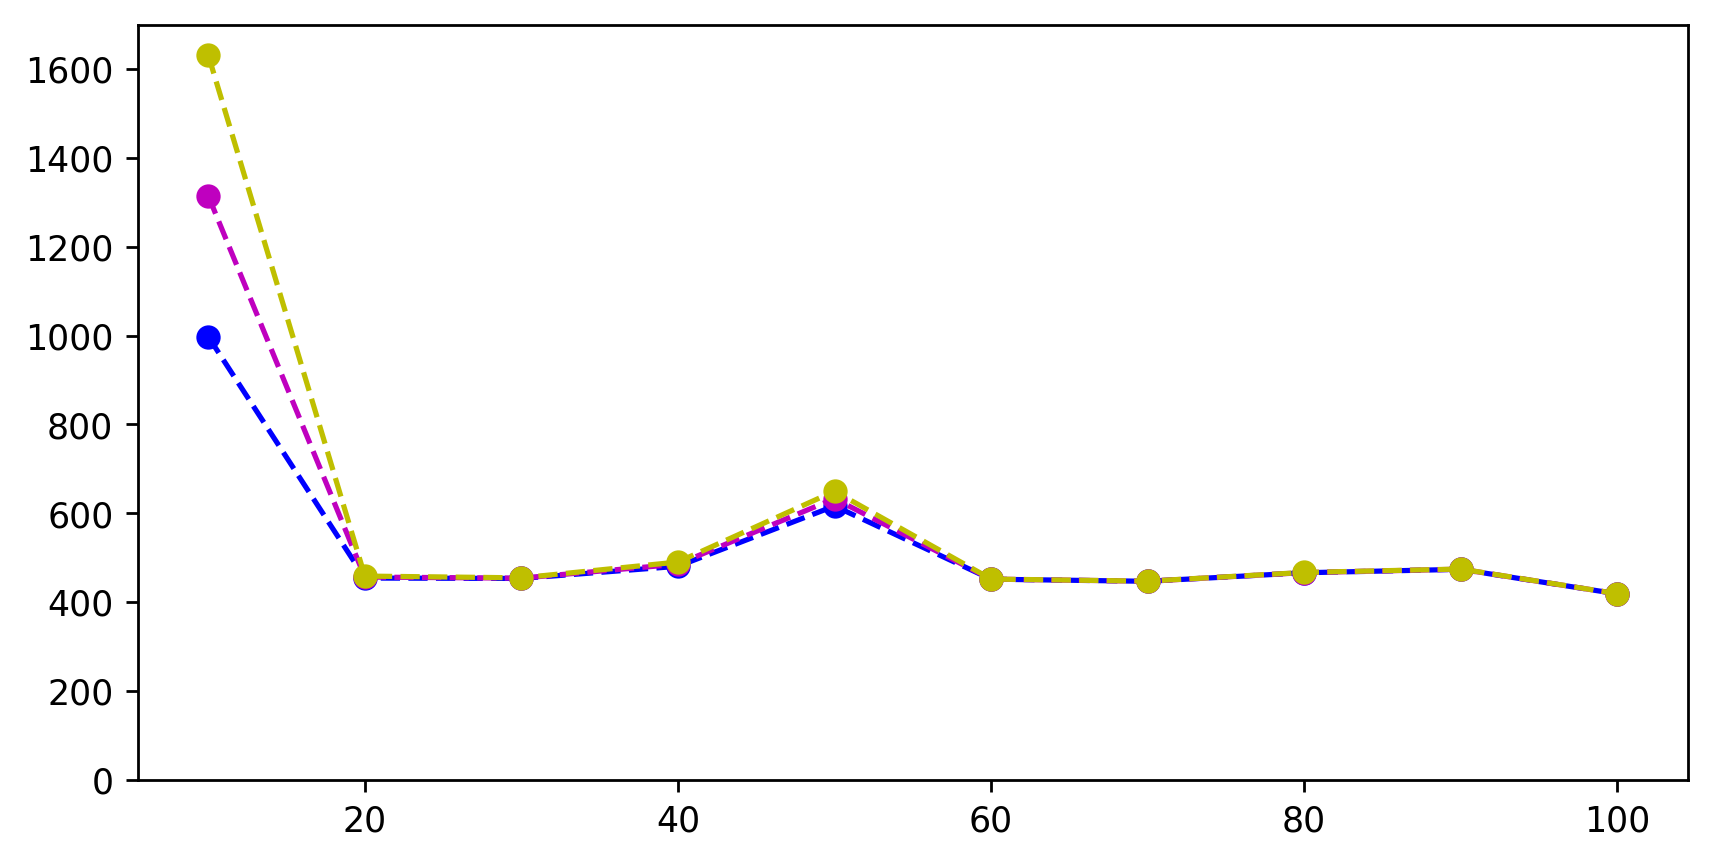

In [242]:
fig     = plt.figure(1,(8,4),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)
plt.plot(ratio,nightsampleh['lower_bound'],'b--')
plt.plot(ratio,nightsampleh['lower_bound'],'bo',label='day_lower')
plt.plot(ratio,nightsampleh['mid_point'],'m--')
plt.plot(ratio,nightsampleh['mid_point'],'mo',label='day_mid')
plt.plot(ratio,nightsampleh['upper_bound'],'y--')
plt.plot(ratio,nightsampleh['upper_bound'],'yo',label='day_upper')
plt.ylim(0,1700)
plt.show()

### all data

In [243]:
#initialize
allsample = [0]*10
#for loop to obtain each samples
for i in range(10):
    allsample[i] = pd.concat([daysample[i],nightsample[i]])

In [244]:
allsample[0]

,time,Cn0DbHz,svid,geometry
1646,2021-08-01 13:04:50,14.950093,G24,POINT Z (109.46392 34.48646 381.00000)
636,2021-08-01 12:59:25,34.177094,R07,POINT Z (109.46422 34.48661 381.00000)
1246,2021-08-01 12:59:48,21.356703,R07,POINT Z (109.46407 34.48650 381.00000)
2640,2021-08-01 13:05:30,29.371233,R23,POINT Z (109.46397 34.48677 381.00000)
2890,2021-08-01 13:05:40,43.805058,R07,POINT Z (109.46409 34.48676 381.00000)
...,...,...,...,...
377,2021-08-03 01:59:49,34.879143,G30,POINT Z (109.46420 34.48632 381.00000)
453,2021-08-03 01:59:52,7.000000,G02,POINT Z (109.46414 34.48630 381.00000)
1300,2021-08-03 01:30:10,38.875473,C08,POINT Z (109.46393 34.48656 381.00000)
1837,2021-08-03 01:28:34,28.743410,C04,POINT Z (109.46418 34.48653 381.00000)


In [245]:
#validate the length of all data
bools = []
for i in range (10):
    a = len(allsample[i]) == sum([len(daysample[i]),len(nightsample[i])])
    bools.append(a)
bools

[True, True, True, True, True, True, True, True, True, True]

In [246]:
#observations 
allsampleobs = [0]*10
for i in range(10):
    allsampleobs[i] = pd.concat([daysampleobs[i],nightsampleobs[i]])

In [247]:
daysampleobs[0].sort_values(by=['time','svid']).head()

,time,svid,Cn0DbHz,geometry
2132,2021-08-01 12:55:19,C02,NaN,LINESTRING Z (-1753787.543 4962400.239 3591293...
2133,2021-08-01 12:55:19,C03,NaN,LINESTRING Z (-1753787.543 4962400.239 3591293...
2134,2021-08-01 12:55:19,C04,NaN,LINESTRING Z (-1753787.543 4962400.239 3591293...
2135,2021-08-01 12:55:19,C05,NaN,LINESTRING Z (-1753787.543 4962400.239 3591293...
2136,2021-08-01 12:55:19,C06,NaN,LINESTRING Z (-1753787.543 4962400.239 3591293...


In [248]:
#heights
allsampleh = [0]*10
for i in range(10):
    allsampleh[i] = gm.predict(mymap,allsampleobs[i].sort_values(by=['time','svid']))

In [249]:
allsampleh

[   lower_bound    mid_point  upper_bound
 0   999.251952  1299.265447  1599.278942,
    lower_bound   mid_point  upper_bound
 0   466.119758  466.565189   467.010619,
    lower_bound   mid_point  upper_bound
 0   591.520689  592.161451   592.802213,
    lower_bound   mid_point  upper_bound
 0   476.079532  477.122352   478.165172,
    lower_bound   mid_point  upper_bound
 0   474.977185  475.578712   476.180239,
    lower_bound   mid_point  upper_bound
 0   607.349438  614.122409   620.895379,
    lower_bound   mid_point  upper_bound
 0   469.344264  470.990471   472.636677,
    lower_bound   mid_point  upper_bound
 0   437.340028  437.470139   437.600251,
    lower_bound   mid_point  upper_bound
 0   429.406262  429.534598   429.662934,
    lower_bound   mid_point  upper_bound
 0   476.237312  476.453934   476.670555]

In [250]:
allsampleh = sampling.combine_height(allsampleh)

In [251]:
allsampleh

,lower_bound,mid_point,upper_bound
0,999.251952,1299.265447,1599.278942
1,466.119758,466.565189,467.010619
2,591.520689,592.161451,592.802213
3,476.079532,477.122352,478.165172
4,474.977185,475.578712,476.180239
5,607.349438,614.122409,620.895379
6,469.344264,470.990471,472.636677
7,437.340028,437.470139,437.600251
8,429.406262,429.534598,429.662934
9,476.237312,476.453934,476.670555


In [252]:
ratio = [10,20,30,40,50,60,70,80,90,100]

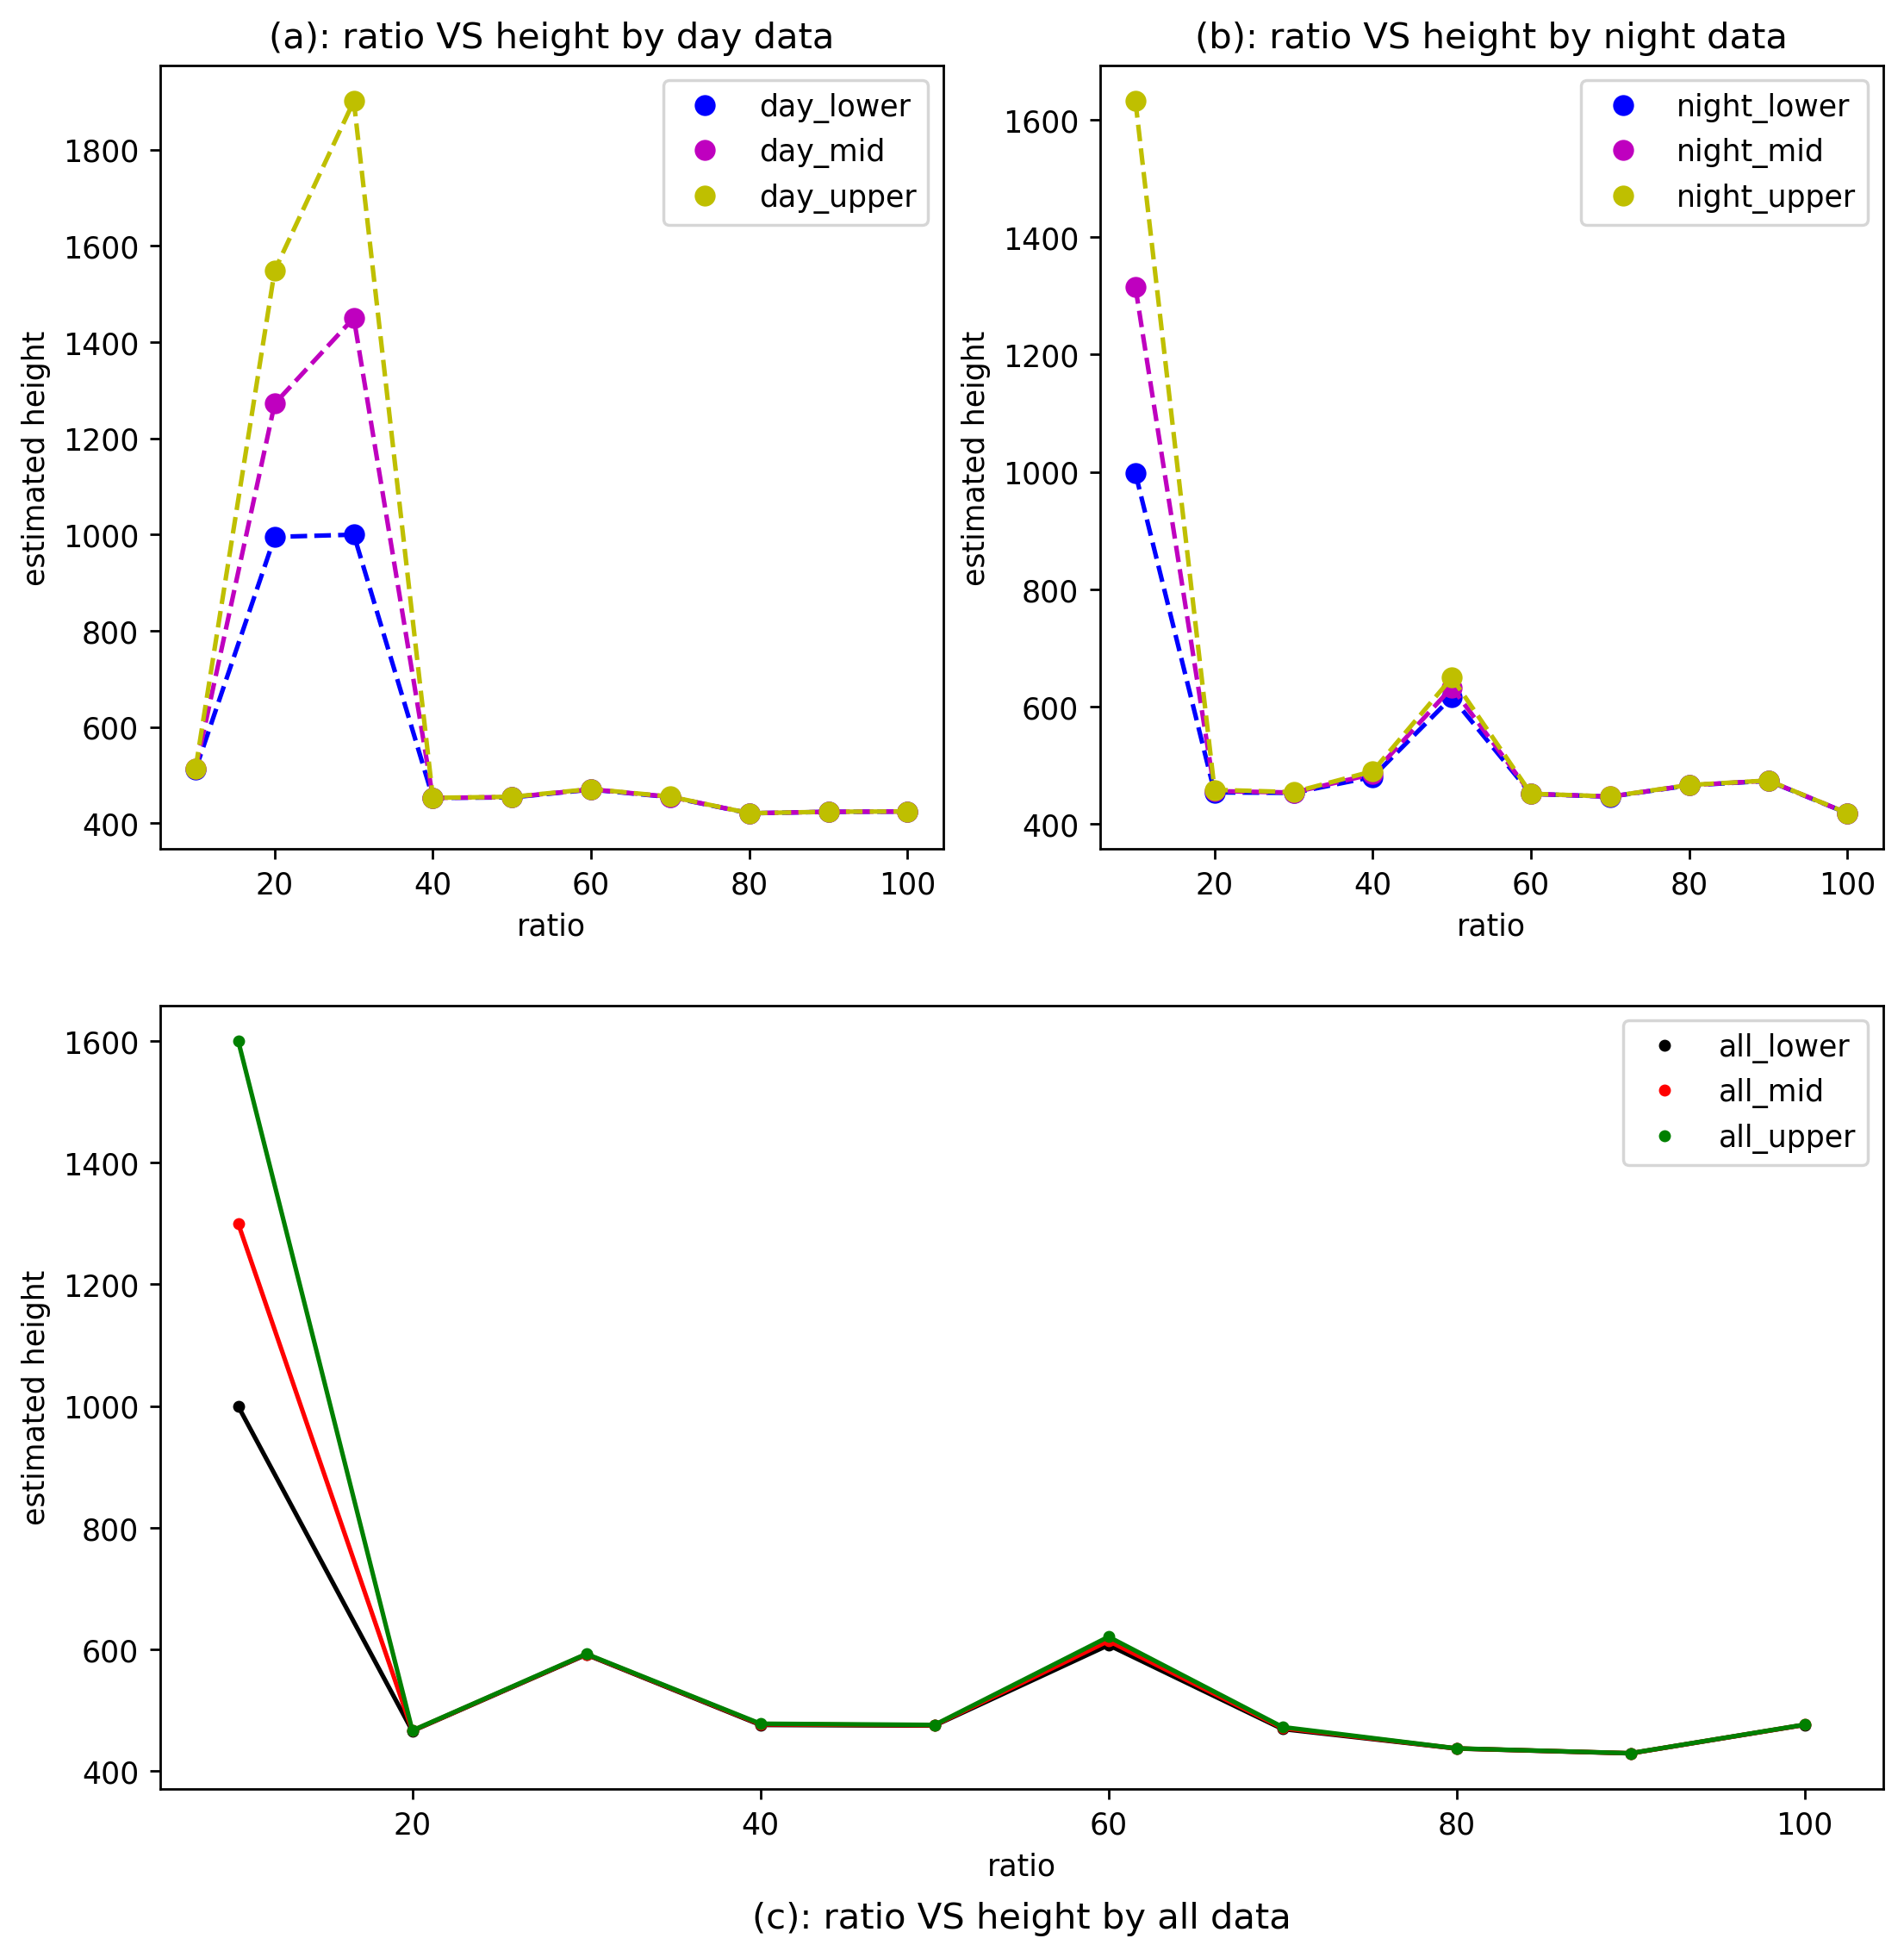

In [253]:
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,10),dpi = 250)   
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,
                wspace=0.2, hspace=0.2)

#day height data
ax = plt.subplot(221)
plt.sca(ax)
plt.plot(ratio,daysampleh['lower_bound'],'b--')
plt.plot(ratio,daysampleh['lower_bound'],'bo',label='day_lower')
plt.plot(ratio,daysampleh['mid_point'],'m--')
plt.plot(ratio,daysampleh['mid_point'],'mo',label='day_mid')
plt.plot(ratio,daysampleh['upper_bound'],'y--')
plt.plot(ratio,daysampleh['upper_bound'],'yo',label='day_upper')
plt.title('(a): ratio VS height by day data')
plt.ylabel('estimated height')
plt.xlabel('ratio')
plt.legend()

#night height data
ax = plt.subplot(222)
plt.sca(ax)
plt.plot(ratio,nightsampleh['lower_bound'],'b--')
plt.plot(ratio,nightsampleh['lower_bound'],'bo',label='night_lower')
plt.plot(ratio,nightsampleh['mid_point'],'m--')
plt.plot(ratio,nightsampleh['mid_point'],'mo',label='night_mid')
plt.plot(ratio,nightsampleh['upper_bound'],'y--')
plt.plot(ratio,nightsampleh['upper_bound'],'yo',label='night_upper')
plt.title('(b): ratio VS height by night data')
plt.ylabel('estimated height')
plt.xlabel('ratio')
plt.legend()

#all data
ax = plt.subplot(212)
plt.sca(ax)
plt.plot(ratio,allsampleh['lower_bound'],'k-')
plt.plot(ratio,allsampleh['lower_bound'],'k.',label='all_lower')
plt.plot(ratio,allsampleh['mid_point'],'r-')
plt.plot(ratio,allsampleh['mid_point'],'r.',label='all_mid')
plt.plot(ratio,allsampleh['upper_bound'],'g-')
plt.plot(ratio,allsampleh['upper_bound'],'g.',label='all_upper')
plt.title('(c): ratio VS height by all data',y=-0.2)
plt.ylabel('estimated height')
plt.xlabel('ratio')
plt.legend()
#plt.savefig('random_frac.jpg')
plt.show()

In [254]:
combine = pd.concat([daysampleh,nightsampleh,allsampleh],axis = 1)

In [256]:
combine.columns = ['lower_day','mid_day','upper_day',
                  'lower_night','mid_night','upper_night',
                   'lower_all','mid_all','upper_all'
                  ]

In [257]:
combine

,lower_day,mid_day,upper_day,lower_night,mid_night,upper_night,lower_all,mid_all,upper_all
0,511.400665,512.677092,513.953519,997.568718,1314.593903,1631.619087,999.251952,1299.265447,1599.278942
1,995.032988,1271.981827,1548.930666,454.005471,456.230823,458.456174,466.119758,466.565189,467.010619
2,999.672334,1450.195993,1900.719652,453.133955,453.816921,454.499887,591.520689,592.161451,592.802213
3,452.497691,452.649007,452.800322,480.497641,485.325280,490.152919,476.079532,477.122352,478.165172
4,453.667915,454.269517,454.871119,616.266885,632.919371,649.571858,474.977185,475.578712,476.180239
5,469.867771,470.455097,471.042422,451.438722,451.601945,451.765168,607.349438,614.122409,620.895379
6,454.255251,454.792694,455.330136,446.721382,446.894564,447.067746,469.344264,470.990471,472.636677
7,420.613992,420.718392,420.822793,465.954114,466.318441,466.682769,437.340028,437.470139,437.600251
8,423.664679,423.755117,423.845555,473.681775,474.003528,474.325280,429.406262,429.534598,429.662934
9,424.171897,424.316936,424.461975,418.427824,418.566382,418.704939,476.237312,476.453934,476.670555


In [258]:
combine['lower_n']=combine['lower_night'] - combine['lower_all']
combine['lower_d']=combine['lower_day'] - combine['lower_all']
combine['mid_n']=combine['mid_night'] - combine['mid_all']
combine['mid_d']=combine['mid_day'] - combine['mid_all']
combine['upper_n']=combine['upper_night'] - combine['upper_all']
combine['upper_d']=combine['upper_day'] - combine['upper_all']

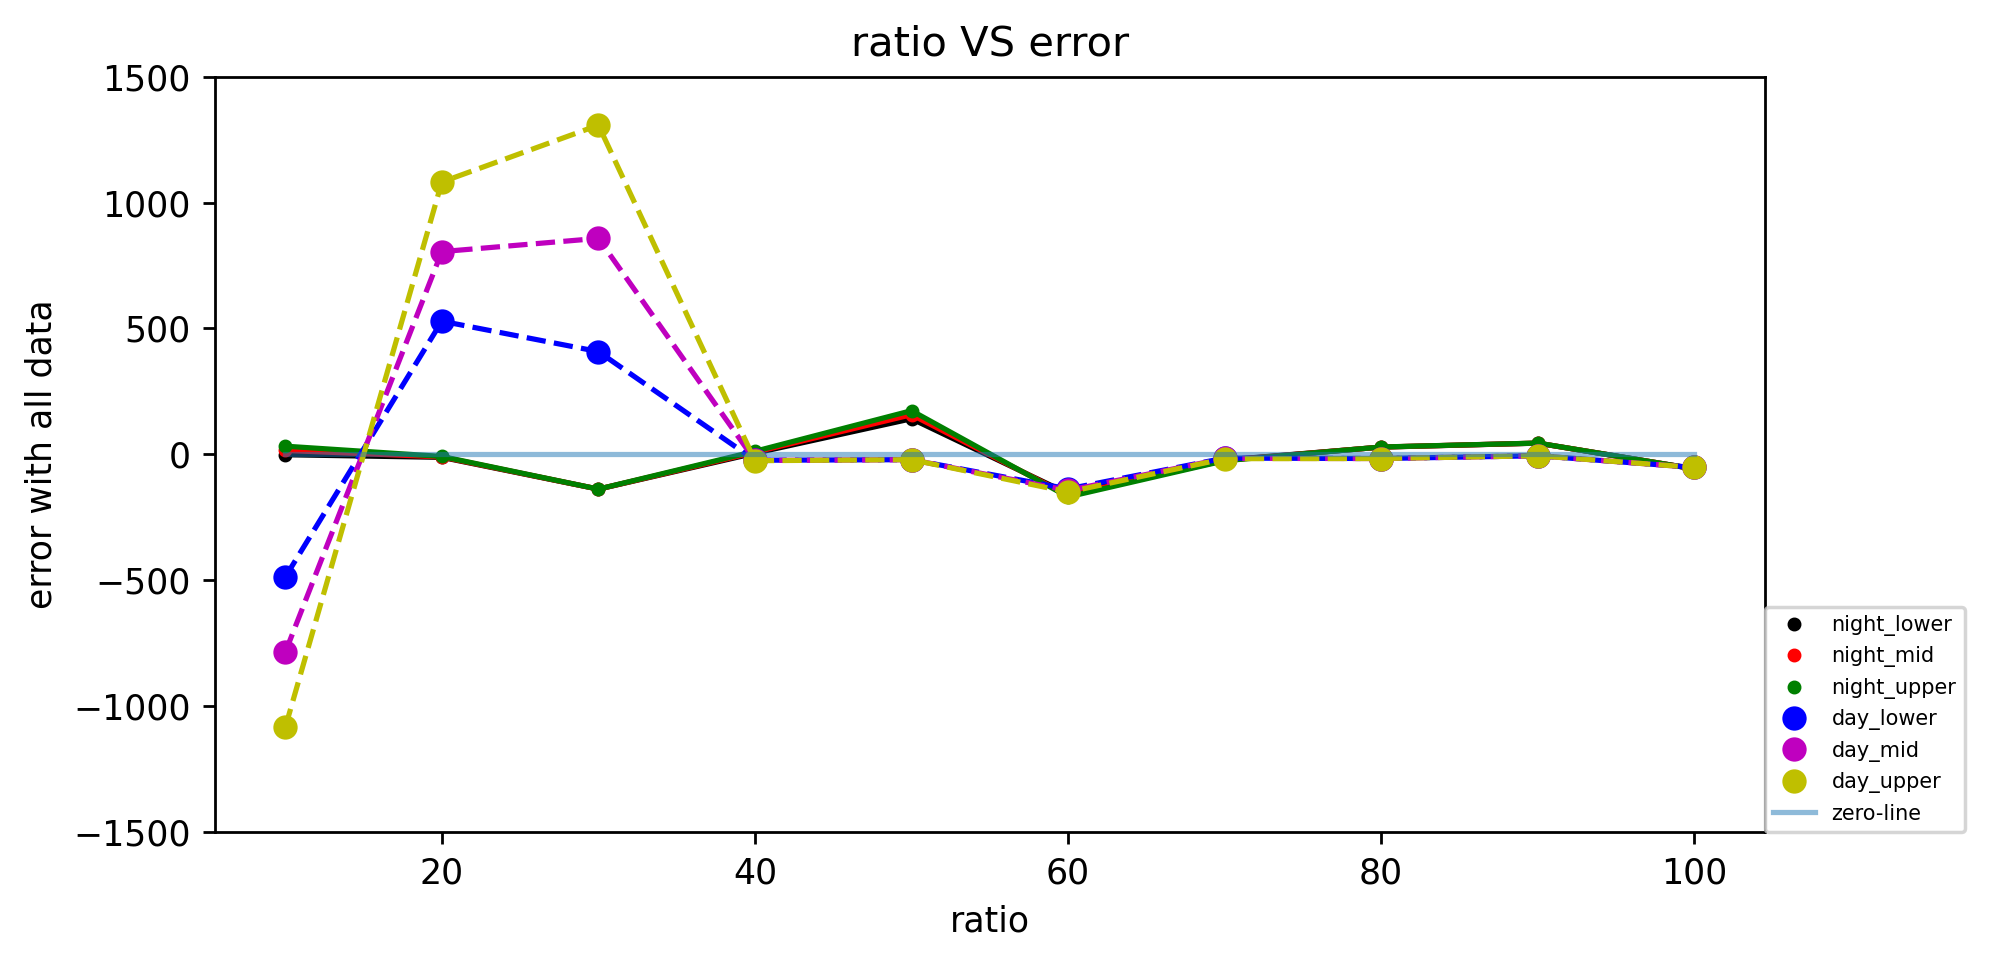

In [271]:
fig = plt.figure(1,(8,4),dpi = 250)    
ax = plt.subplot(111)
plt.sca(ax)

#night height data
plt.plot(ratio,combine['lower_n'],'k-')
plt.plot(ratio,combine['lower_n'],'k.',label='night_lower')
plt.plot(ratio,combine['mid_n'],'r-')
plt.plot(ratio,combine['mid_n'],'r.',label='night_mid')
plt.plot(ratio,combine['upper_n'],'g-')
plt.plot(ratio,combine['upper_n'],'g.',label='night_upper')
#day height data
plt.plot(ratio,combine['lower_d'],'b--')
plt.plot(ratio,combine['lower_d'],'bo',label='day_lower')
plt.plot(ratio,combine['mid_d'],'m--')
plt.plot(ratio,combine['mid_d'],'mo',label='day_mid')
plt.plot(ratio,combine['upper_d'],'y--')
plt.plot(ratio,combine['upper_d'],'yo',label='day_upper')

plt.plot([10,100],[0,0], alpha=0.5,label = 'zero-line')

plt.title('ratio VS error')

plt.ylim(-1500,1500)
plt.ylabel('error with all data')
plt.xlabel('ratio')
num1=1.0
num2 = 0
num3=3
num4=0
plt.legend(fontsize=6,bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4)
plt.savefig('random_error.jpg')
plt.show()

## 3.2 sampling by direction

### north

In [297]:
time_start=time.time()
northday = sampling.direction_north(daydata,mymap)
time_end=time.time()
print('run time is: ',time_end-time_start)
northnight = sampling.direction_north(nightdata,mymap)
northall = pd.concat([northday,northnight])

run time is:  0.03689908981323242


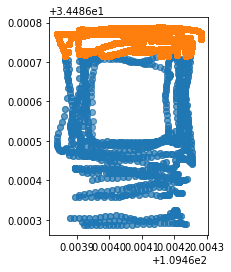

In [298]:
ax = alldata.plot(alpha=0.05)
ax = northall.plot(ax=ax, alpha=0.6)

In [299]:
len(northall)

6850

In [300]:
len(northall) == sum([len(northday),len(northnight)])

True

In [301]:
ob_north_day = gm.observe(northday)
ob_north_night = gm.observe(northnight)
ob_north = pd.concat([ob_north_day,ob_north_night],axis = 0)

In [302]:
ob_north.head()

,time,svid,Cn0DbHz,geometry
0,2021-08-01 12:55:19,C02,NaN,LINESTRING Z (-1753787.543 4962400.239 3591293...
1,2021-08-01 12:55:19,C03,NaN,LINESTRING Z (-1753787.543 4962400.239 3591293...
2,2021-08-01 12:55:19,C04,NaN,LINESTRING Z (-1753787.543 4962400.239 3591293...
3,2021-08-01 12:55:19,C05,NaN,LINESTRING Z (-1753787.543 4962400.239 3591293...
4,2021-08-01 12:55:19,C06,32.4585,LINESTRING Z (-1753787.543 4962400.239 3591293...


In [331]:
height_north_day = gm.predict(mymap,ob_north_day.sort_values(by=['Cn0DbHz']))
height_north_night = gm.predict(mymap,ob_north_night.sort_values(by=['Cn0DbHz']))
height_north = gm.predict(mymap,ob_north.sort_values(by=['Cn0DbHz']))

### south

In [312]:
time_start=time.time()
southday = sampling.direction_south(daydata,mymap)
time_end=time.time()
print('run time is: ',time_end-time_start)
southnight = sampling.direction_south(nightdata,mymap)
southall = pd.concat([southday,southnight])

run time is:  0.03776407241821289


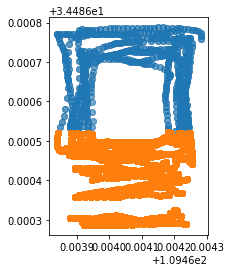

In [313]:
ax = alldata.plot(alpha=0.05)
ax = southall.plot(ax=ax, alpha=0.6)

In [314]:
len(southall)

15302

In [315]:
len(southall) == sum([len(southday),len(southnight)])

True

In [316]:
ob_south_day = gm.observe(southday)
ob_south_night = gm.observe(southnight)
ob_south = pd.concat([ob_south_day,ob_south_night],axis=0)

In [324]:
ob_south.head()

,time,svid,Cn0DbHz,geometry
0,2021-08-01 12:56:11,C02,NaN,LINESTRING Z (-1753766.047 4962421.294 3591274...
1,2021-08-01 12:56:11,C03,NaN,LINESTRING Z (-1753766.047 4962421.294 3591274...
2,2021-08-01 12:56:11,C04,NaN,LINESTRING Z (-1753766.047 4962421.294 3591274...
3,2021-08-01 12:56:11,C05,NaN,LINESTRING Z (-1753766.047 4962421.294 3591274...
4,2021-08-01 12:56:11,C06,27.25592,LINESTRING Z (-1753766.047 4962421.294 3591274...


In [327]:
height_south_day = gm.predict(mymap,ob_south_day.sort_values(by=['Cn0DbHz']))
height_south_night = gm.predict(mymap,ob_south_night.sort_values(by=['Cn0DbHz']))
height_south = gm.predict(mymap,ob_south.sort_values(by=['Cn0DbHz']))

### west

In [336]:
time_start=time.time()
westday = sampling.direction_west(daydata,mymap)
time_end=time.time()
print('run time is: ',time_end-time_start)
westnight = sampling.direction_west(nightdata,mymap)
westall = pd.concat([westday,westnight])

run time is:  0.03656005859375


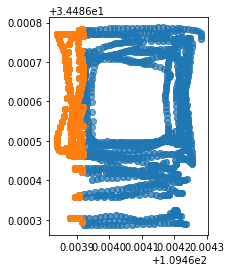

In [337]:
ax = alldata.plot(alpha=0.05)
ax = westall.plot(ax=ax, alpha=0.6)

In [338]:
len(westall)

4623

In [339]:
len(westall) == sum([len(westday),len(westnight)])

True

In [340]:
ob_west_day = gm.observe(westday)
ob_west_night = gm.observe(westnight)
ob_west = pd.concat([ob_west_day,ob_west_night],axis=0)

In [341]:
ob_west.head()

,time,svid,Cn0DbHz,geometry
0,2021-08-01 12:55:48,C02,NaN,LINESTRING Z (-1753764.842 4962409.061 3591292...
1,2021-08-01 12:55:48,C03,NaN,LINESTRING Z (-1753764.842 4962409.061 3591292...
2,2021-08-01 12:55:48,C04,NaN,LINESTRING Z (-1753764.842 4962409.061 3591292...
3,2021-08-01 12:55:48,C05,NaN,LINESTRING Z (-1753764.842 4962409.061 3591292...
4,2021-08-01 12:55:48,C06,31.217871,LINESTRING Z (-1753764.842 4962409.061 3591292...


In [342]:
height_west_day = gm.predict(mymap,ob_west_day.sort_values(by=['Cn0DbHz']))
height_west_night = gm.predict(mymap,ob_west_night.sort_values(by=['Cn0DbHz']))
height_west = gm.predict(mymap,ob_west.sort_values(by=['Cn0DbHz']))

### east

In [346]:
time_start=time.time()
eastday = sampling.direction_east(daydata,mymap)
time_end=time.time()
print('run time is: ',time_end-time_start)
eastnight = sampling.direction_east(nightdata,mymap)
eastall = pd.concat([eastday,eastnight])

run time is:  0.03969097137451172


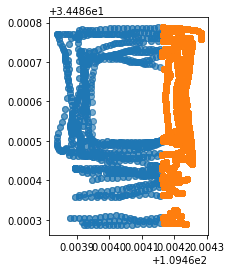

In [347]:
ax = alldata.plot(alpha=0.05)
ax = eastall.plot(ax=ax, alpha=0.6)

In [348]:
len(eastall)

12792

In [349]:
len(eastall) == sum([len(eastday),len(eastnight)])

True

In [350]:
ob_east_day = gm.observe(eastday)
ob_east_night = gm.observe(eastnight)
ob_east = pd.concat([ob_east_day,ob_east_night],axis=0)

In [351]:
ob_east.head()

,time,svid,Cn0DbHz,geometry
0,2021-08-01 12:55:19,C02,NaN,LINESTRING Z (-1753787.543 4962400.239 3591293...
1,2021-08-01 12:55:19,C03,NaN,LINESTRING Z (-1753787.543 4962400.239 3591293...
2,2021-08-01 12:55:19,C04,NaN,LINESTRING Z (-1753787.543 4962400.239 3591293...
3,2021-08-01 12:55:19,C05,NaN,LINESTRING Z (-1753787.543 4962400.239 3591293...
4,2021-08-01 12:55:19,C06,32.4585,LINESTRING Z (-1753787.543 4962400.239 3591293...


In [352]:
height_east_day = gm.predict(mymap,ob_east_day.sort_values(by=['Cn0DbHz']))
height_east_night = gm.predict(mymap,ob_east_night.sort_values(by=['Cn0DbHz']))
height_east = gm.predict(mymap,ob_east.sort_values(by=['Cn0DbHz']))

### analysis

In [357]:
north = pd.concat([height_north_day,height_north_night,height_north],axis = 1)

In [359]:
north.columns = ['lowerday','midday','upperday',
                'lowernight','midnight','uppernight',
                'lowerall','midall','upperall']
north

,lowerday,midday,upperday,lowernight,midnight,uppernight,lowerall,midall,upperall
0,419.596518,419.902103,420.207687,984.868342,2484.868342,3984.868342,560.064343,562.321669,564.578994


In [360]:
south = pd.concat([height_south_day,height_south_night,height_south],axis = 1)
west = pd.concat([height_west_day,height_west_night,height_west],axis = 1)
east = pd.concat([height_east_day,height_east_night,height_east],axis = 1)
south.columns = ['lowerday','midday','upperday',
                'lowernight','midnight','uppernight',
                'lowerall','midall','upperall']
west.columns = ['lowerday','midday','upperday',
                'lowernight','midnight','uppernight',
                'lowerall','midall','upperall']
east.columns = ['lowerday','midday','upperday',
                'lowernight','midnight','uppernight',
                'lowerall','midall','upperall']

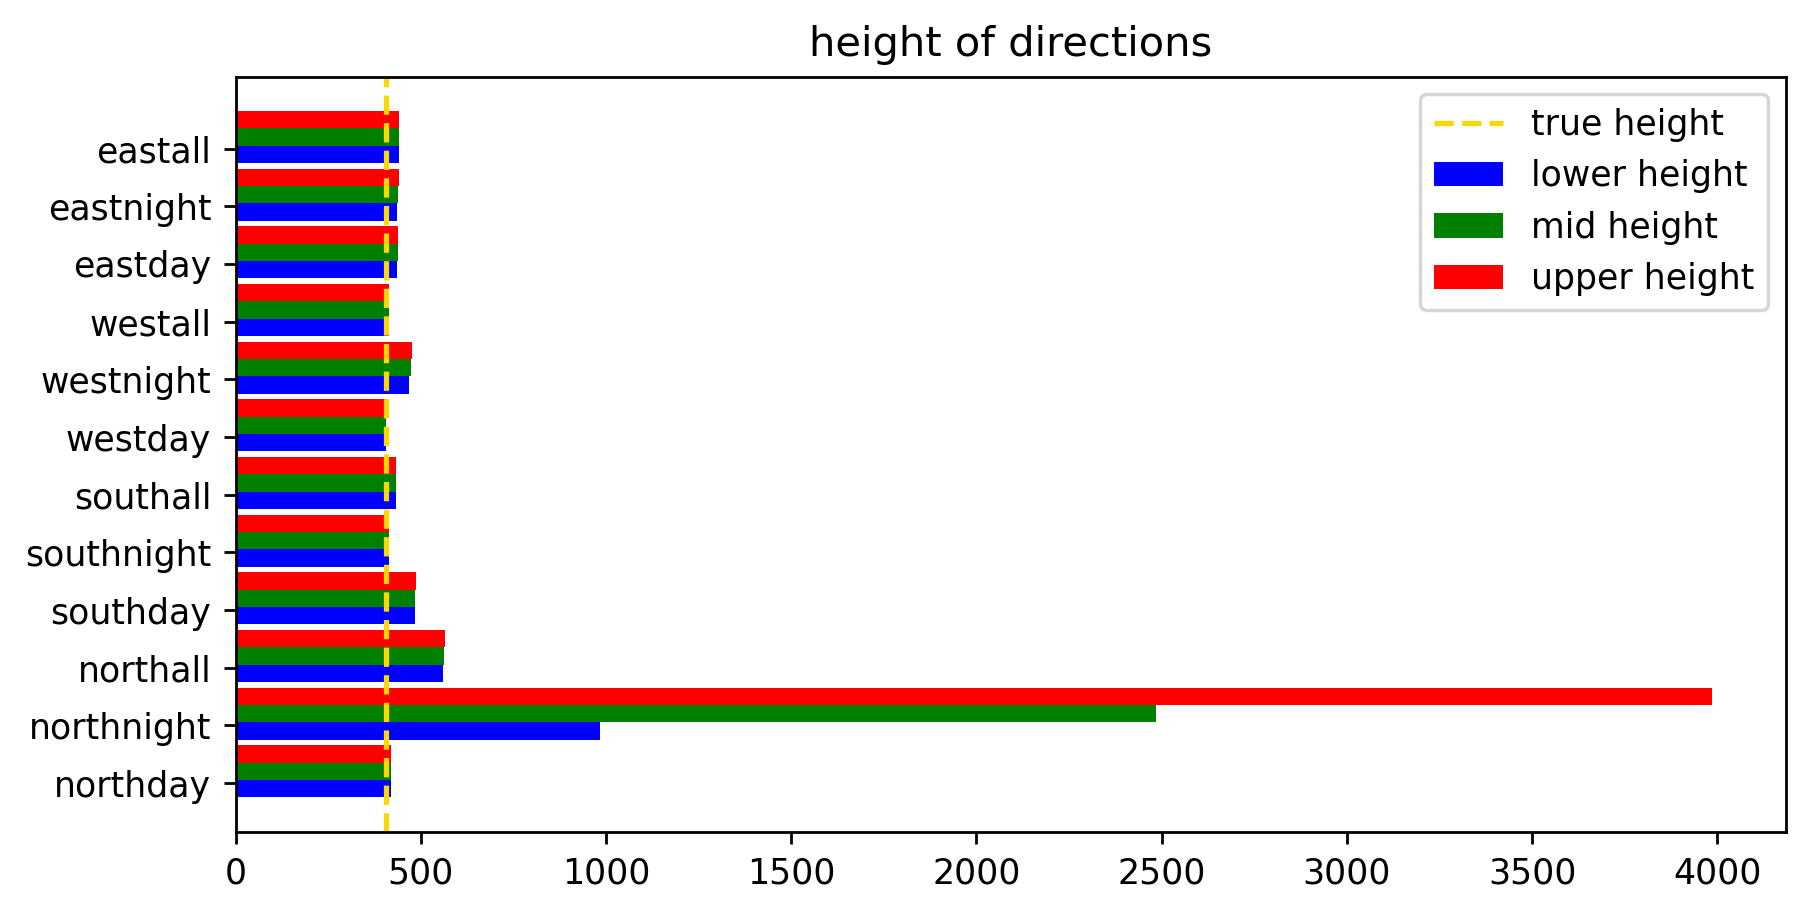

In [405]:
fig = plt.figure(1,(8,4),dpi = 250)    
ax = plt.subplot(111)
plt.sca(ax)
direction = ('northday','northnight','northall',
             'southday','southnight','southall',
             'westday','westnight','westall',
             'eastday','eastnight','eastall')
lower = pd.DataFrame([north.lowerday,north.lowernight,north.lowerall,
         south.lowerday,south.lowernight,south.lowerall,
         west.lowerday,west.lowernight,west.lowerall,
         east.lowerday,east.lowernight,east.lowerall])
lower.columns = ['lowerheight']

mid = pd.DataFrame([north.midday,north.midnight,north.midall,
         south.midday,south.midnight,south.midall,
         west.midday,west.midnight,west.midall,
         east.midday,east.midnight,east.midall])
mid.columns = ['midheight']

upper = pd.DataFrame([north.upperday,north.uppernight,north.upperall,
         south.upperday,south.uppernight,south.upperall,
         west.upperday,west.uppernight,west.upperall,
         east.upperday,east.uppernight,east.upperall])
upper.columns = ['upperheight']

bar_width = 0.3  #width of bar
index_lower = np.arange(len(direction))
index_mid = index_lower + bar_width
index_upper = index_mid + bar_width

plt.barh(index_lower, height=bar_width, width=lower.lowerheight, color='b', label='lower height')
plt.barh(index_mid, height=bar_width, width=mid.midheight, color='g', label='mid height')
plt.barh(index_upper, height=bar_width, width=upper.upperheight, color='r', label='upper height')

plt.axvline(405, color='gold', linestyle='--', label='true height')

plt.yticks(np.arange(len(direction))+bar_width/3,direction)
plt.title('height of directions')
plt.legend()
plt.savefig('direction.jpg')
plt.show()

In [421]:
daydata.to_csv(r'daydata.csv')

In [422]:
nightdata.to_csv(r'nightdata.csv')

In [423]:
alldata.to_csv(r'alldata.csv')